In [ ]:
import numpy as np
import os
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/MLTL/cells (1) (1).zip"

Archive:  /content/drive/MyDrive/MLTL/cells (1) (1).zip
   creating: cells/
  inflating: cells/cells.zip         
  inflating: cells/cells2.txt        
  inflating: cells/labels.mat        


In [ ]:
!unzip "//content/cells/cells.zip"

Number of images: 63448
Image: 17380.png
Dimensions: 91 x 62
Channels: 3
File format: .png
---------------------


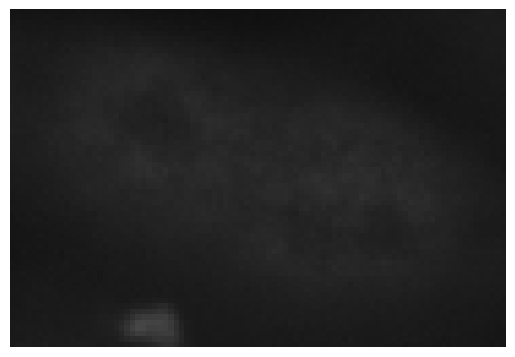

Image: 21131.png
Dimensions: 83 x 76
Channels: 3
File format: .png
---------------------


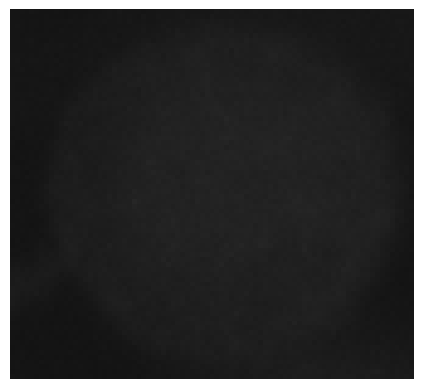

Image: 53422.png
Dimensions: 68 x 70
Channels: 3
File format: .png
---------------------


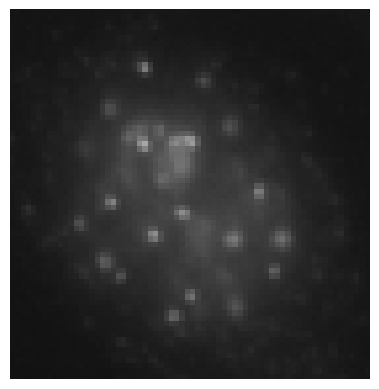

Image: 21887.png
Dimensions: 79 x 84
Channels: 3
File format: .png
---------------------


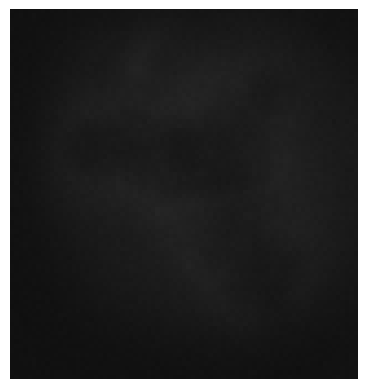

Image: 23985.png
Dimensions: 70 x 75
Channels: 3
File format: .png
---------------------


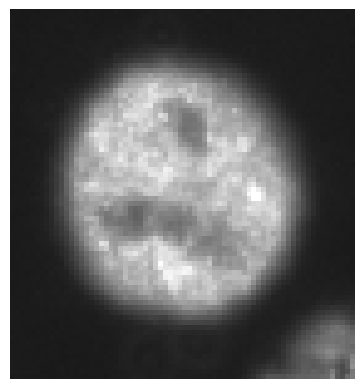

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

image_directory = "/content/cells"


image_files = os.listdir(image_directory)


num_images = len(image_files)
print("Number of images:", num_images)


sample_size = 5


sample_images = np.random.choice(image_files, size=sample_size, replace=False)


for image_file in sample_images:
    image_path = os.path.join(image_directory, image_file)


    image = cv2.imread(image_path)
    height, width, channels = image.shape


    _, file_extension = os.path.splitext(image_file)


    print("Image:", image_file)
    print("Dimensions:", width, "x", height)
    print("Channels:", channels)
    print("File format:", file_extension)
    print("---------------------")


    mage = cv2.imread("sample.jpg")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    plt.imshow(image_rgb)
    plt.axis('off')  # Remove the axis labels
    plt.show()
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [ ]:
import os
import cv2


image_directory = "/content/cells"


image_files = os.listdir(image_directory)


corrupted_files = []

for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)

    try:

        image = cv2.imread(image_path)


        if image is None:
            corrupted_files.append(image_file)

    except Exception as e:

        corrupted_files.append(image_file)


print("Corrupted files:", corrupted_files)


for corrupted_file in corrupted_files:
    corrupted_file_path = os.path.join(image_directory, corrupted_file)
    os.remove(corrupted_file_path)


cleaned_files = list(set(image_files) - set(corrupted_files))
num_cleaned_images = len(cleaned_files)
print("Number of cleaned images:", num_cleaned_images)


Corrupted files: ['cells.zip', 'labels.mat', 'cells2.txt']
Number of cleaned images: 63445


In [ ]:
import os
import cv2
import numpy as np

image_directory = "/content/cells"


target_size = (70 ,70)  # Desired size for the images


preprocessed_directory = "/content/augmented"
os.makedirs(preprocessed_directory, exist_ok=True)

for i in range(1, 63446):
    image_file = f"{i}.png"
    image_path = os.path.join(image_directory, image_file)


    image = cv2.imread(image_path)


    resized_image = cv2.resize(image, target_size)

    # Scale pixel values between 0 and 1
    scaled_image = resized_image.astype(np.float32) / 255.0


    preprocessed_path = os.path.join(preprocessed_directory, image_file)
    cv2.imwrite(preprocessed_path, scaled_image * 255.0)
    print(i)

In [ ]:
import csv

with open("/content/drive/MyDrive/MLTL/label (1).csv", mode = 'r') as file:

  csvFile = np.array(list(csv.reader(file)))[1:, 1].astype("float16") - 1

  for lines in csvFile:
        print(type(lines))
        break

<class 'numpy.float16'>


In [ ]:
all_images = np.array([cv2.imread(f"{preprocessed_directory}/{i}.png", 0) for i in range(1, 63446)])

In [ ]:
import os
import csv
from sklearn.model_selection import train_test_split




test_size = 0.2  # 20% of the data will be used for testing
random_state = 42

# Perform train-test split
train_files, test_files, train_labels, test_labels = train_test_split(all_images, csvFile, test_size=test_size, random_state=random_state)

print("Number of training images:", len(train_files))
print("Number of testing images:", len(test_files))


Number of training images: 50756
Number of testing images: 12689


In [ ]:
import numpy as np



# Save the preprocessed train data and labels
np.save('train_data.npy', train_files)
np.save('train_labels.npy', train_labels)

# Save the preprocessed test data and labels
np.save('test_data.npy', test_files)
np.save('test_labels.npy', test_labels)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 1)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from sklearn.metrics import classification_report
import numpy as np


train_data = np.load('train_data.npy').reshape(-1, 70, 70, 1)
train_labels = np.load('train_labels.npy')
test_data = np.load('test_data.npy').reshape(-1, 70, 70, 1)
test_labels = np.load('test_labels.npy')
print(np.array(train_data).shape)
print(np.array(train_labels).shape)
print(np.array(test_data).shape)
print(np.array(test_labels).shape)

print(train_labels[:10])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


training_acc = []
test_acc = []
training_loss = []
test_loss = []
f1_score = []

# Train the model
for i in range(10):
    print(f"Epoch {i} ")
    history = model.fit(train_data, train_labels, epochs=1, batch_size=32, validation_data=(test_data, test_labels), verbose=1)
    reshaped_test_predictions = np.argmax(model.predict(test_data), axis=1)
    report = classification_report(test_labels, reshaped_test_predictions, output_dict=True)

    training_acc.append(history.history["accuracy"][0])
    test_acc.append(history.history["val_accuracy"][0])
    training_loss.append(history.history["loss"][0])
    test_loss.append(history.history["val_loss"][0])
    f1_score.append(np.average([report[f"{j}.0"]["f1-score"] for j in range(6)]))


(50756, 70, 70, 1)
(50756,)
(12689, 70, 70, 1)
(12689,)
[4. 0. 0. 2. 3. 0. 2. 3. 0. 0.]
397/397 [==============================] - 1s 3ms/step


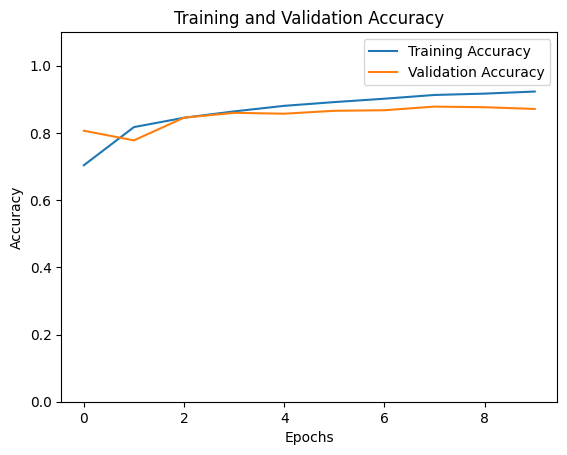

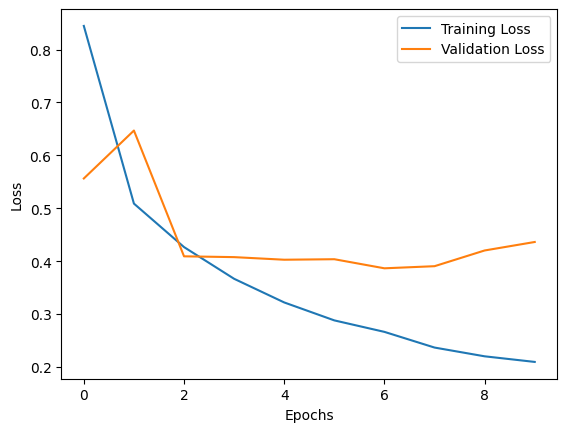

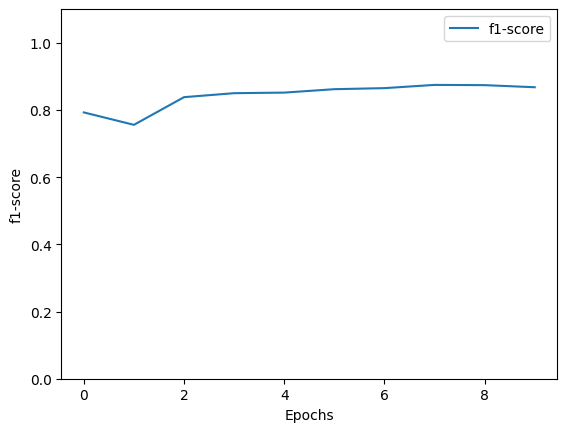

In [ ]:
import matplotlib.pyplot as plt

# Plotting the accuracy
plt.figure()
plt.plot(training_acc, label='Training Accuracy')
plt.plot(test_acc, label='Validation Accuracy')
plt.ylim(0, 1.1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plotting the loss
plt.figure()
plt.plot(training_loss, label='Training Loss')
plt.plot(test_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the f1-score
plt.figure()
plt.plot(f1_score, label='f1-score')
plt.ylim(0, 1.1)
plt.xlabel('Epochs')
plt.ylabel('f1-score')
plt.legend()
plt.show()